<a href="https://colab.research.google.com/github/nkxtyy/Plastic-waste-image-classification/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/dataset.zip -d /content/


Archive:  /content/drive/MyDrive/dataset.zip
   creating: /content/dataset/non-plastic/
  inflating: /content/dataset/non-plastic/biological1001.jpeg  
  inflating: /content/dataset/non-plastic/biological1002.jpeg  
  inflating: /content/dataset/non-plastic/biological1003.jpeg  
  inflating: /content/dataset/non-plastic/biological1004.jpeg  
  inflating: /content/dataset/non-plastic/biological1005.jpeg  
  inflating: /content/dataset/non-plastic/biological1006.jpeg  
  inflating: /content/dataset/non-plastic/biological1007.jpeg  
  inflating: /content/dataset/non-plastic/biological1008.jpeg  
  inflating: /content/dataset/non-plastic/biological1009.jpeg  
  inflating: /content/dataset/non-plastic/biological1010.jpeg  
  inflating: /content/dataset/non-plastic/biological1011.jpeg  
  inflating: /content/dataset/non-plastic/biological1012.jpeg  
  inflating: /content/dataset/non-plastic/biological1013.jpeg  
  inflating: /content/dataset/non-plastic/biological1014.jpeg  
  inflating: /co

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)


train_generator = train_datagen.flow_from_directory(
    '/content/dataset',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)


validation_generator = train_datagen.flow_from_directory(
    '/content/dataset',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 1376 images belonging to 2 classes.
Found 344 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/50
43/43 [==============================] - 86s 2s/step - loss: 0.6220 - accuracy: 0.6664 - val_loss: 0.3850 - val_accuracy: 0.9000
Epoch 2/50
43/43 [==============================] - 80s 2s/step - loss: 0.5590 - accuracy: 0.7144 - val_loss: 0.4451 - val_accuracy: 0.8313
Epoch 3/50
43/43 [==============================] - 91s 2s/step - loss: 0.5484 - accuracy: 0.7129 - val_loss: 0.4375 - val_accuracy: 0.7750
Epoch 4/50
43/43 [==============================] - 82s 2s/step - loss: 0.5260 - accuracy: 0.7326 - val_loss: 0.4419 - val_accuracy: 0.7406
Epoch 5/50
43/43 [==============================] - 84s 2s/step - loss: 0.5063 - accuracy: 0.7376 - val_loss: 0.4294 - val_accuracy: 0.7594
Epoch 6/50
43/43 [==============================] - 81s 2s/step - loss: 0.4926 - accuracy: 0.7536 - val_loss: 0.4330 - val_accuracy: 0.8531
Epoch 7/50
43/43 [==============================] - 86s 2s/step - loss: 0.4868 - accuracy: 0.7616 - val_loss: 0.4125 - val_accuracy: 0.7781
Epoch 8/50
43/43 [==

In [ ]:
model.save('/content/drive/MyDrive/plastic_classifier_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

val_loss, val_acc = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")


10/10 [==============================] - 8s 794ms/step - loss: 0.2690 - accuracy: 0.9156
Validation Loss: 0.26902633905410767
Validation Accuracy: 0.9156249761581421


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

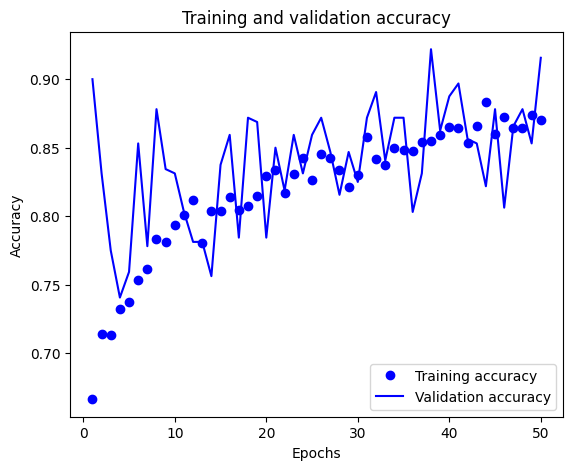

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

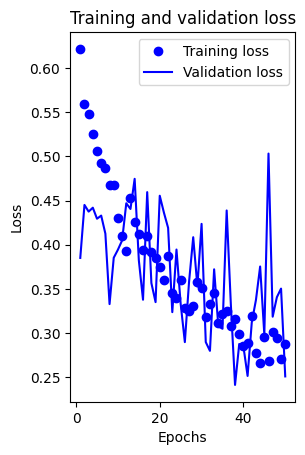

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

11/11 [==============================] - 11s 921ms/step


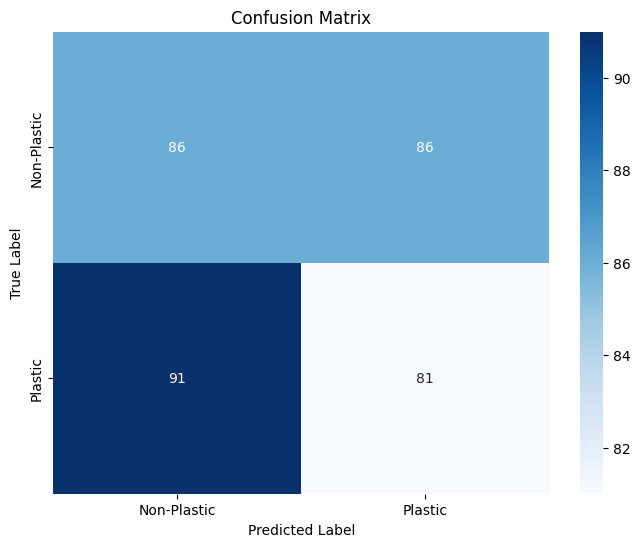

              precision    recall  f1-score   support

 Non-Plastic       0.49      0.50      0.49       172
     Plastic       0.49      0.47      0.48       172

    accuracy                           0.49       344
   macro avg       0.49      0.49      0.49       344
weighted avg       0.49      0.49      0.49       344



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


validation_generator.reset()
Y_pred = model.predict(validation_generator, validation_generator.samples // validation_generator.batch_size + 1)
y_pred = np.round(Y_pred).astype(int)


y_true = validation_generator.classes


conf_matrix = confusion_matrix(y_true, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Plastic', 'Plastic'], yticklabels=['Non-Plastic', 'Plastic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


print(classification_report(y_true, y_pred, target_names=['Non-Plastic', 'Plastic']))


1/1 [==============================] - 1s 1s/step


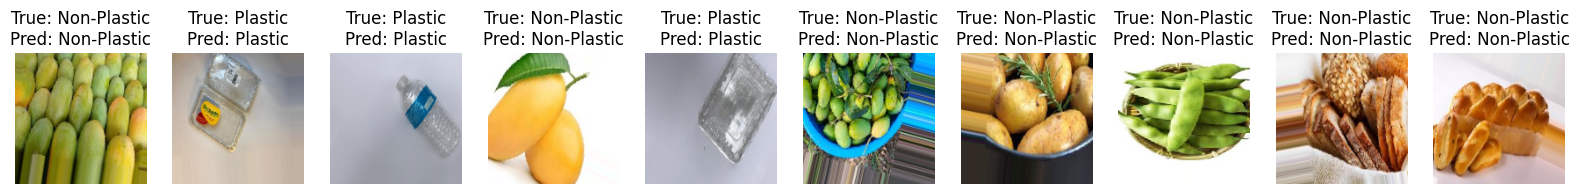

In [ ]:
# Function to plot example images with predictions
def plot_examples(generator, model, num_images=10):
    images, labels = next(generator)
    predictions = model.predict(images)
    fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
    for i in range(num_images):
        ax = axes[i]
        ax.imshow(images[i])
        pred_label = 'Plastic' if predictions[i] > 0.5 else 'Non-Plastic'
        true_label = 'Plastic' if labels[i] == 1 else 'Non-Plastic'
        ax.set_title(f"True: {true_label}\nPred: {pred_label}")
        ax.axis('off')
    plt.show()


validation_generator.reset()
plot_examples(validation_generator, model)


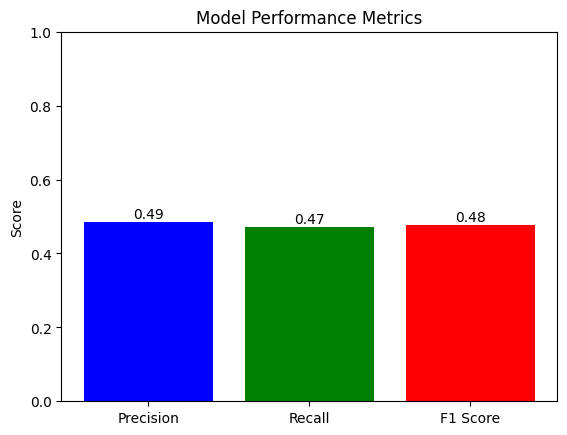

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')


metrics = {'Precision': precision, 'Recall': recall, 'F1 Score': f1}
fig, ax = plt.subplots()
ax.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red'])
ax.set_ylim([0, 1])
ax.set_title('Model Performance Metrics')
ax.set_ylabel('Score')
for i, v in enumerate(metrics.values()):
    ax.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.show()


1/1 [==============================] - 0s 198ms/step


<ipython-input-19-a273688ce731>:31: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()
<ipython-input-19-a273688ce731>:34: RuntimeWarning: invalid value encountered in cast
  channel_image = np.clip(channel_image, 0, 255).astype('uint8')


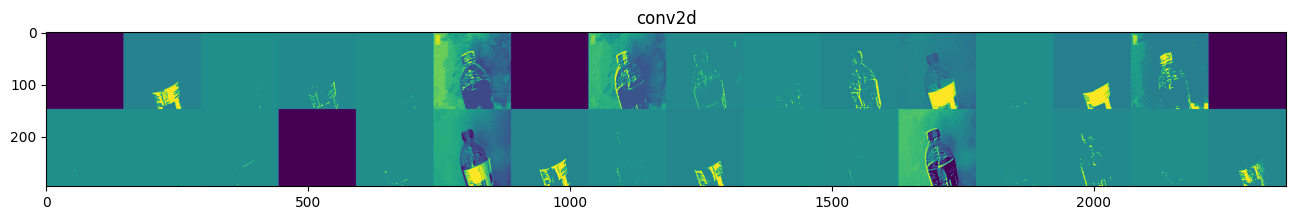

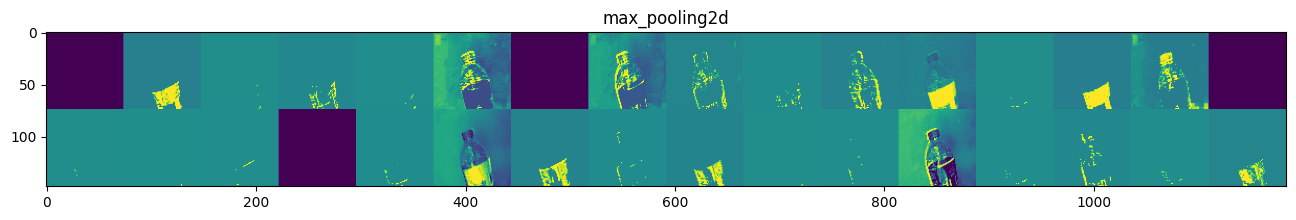

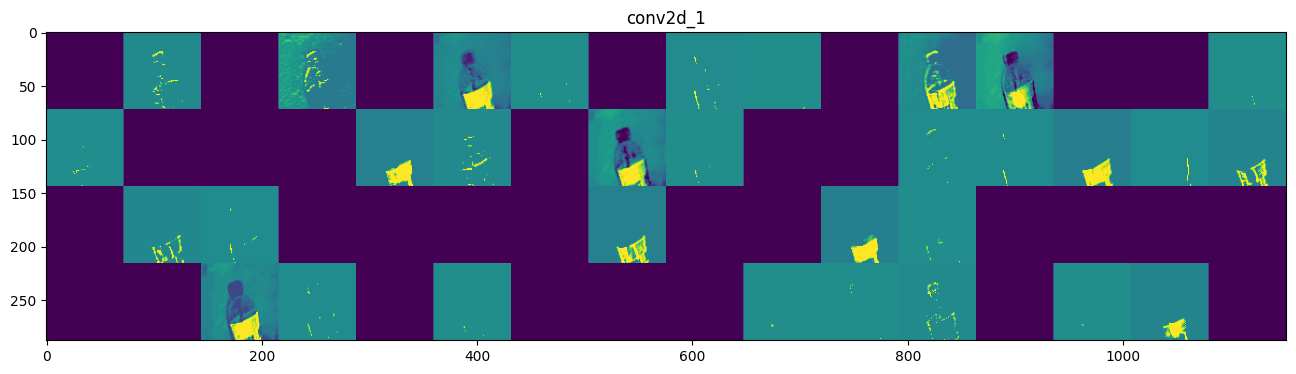

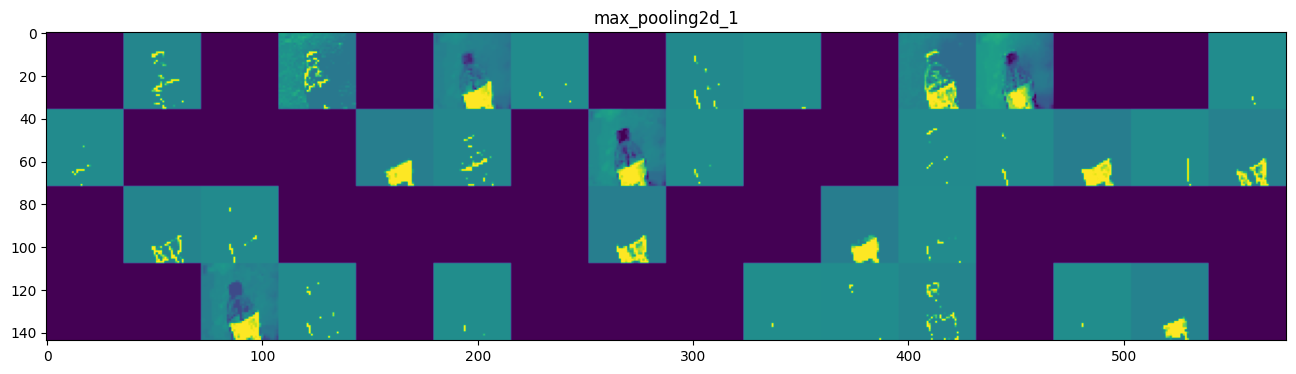

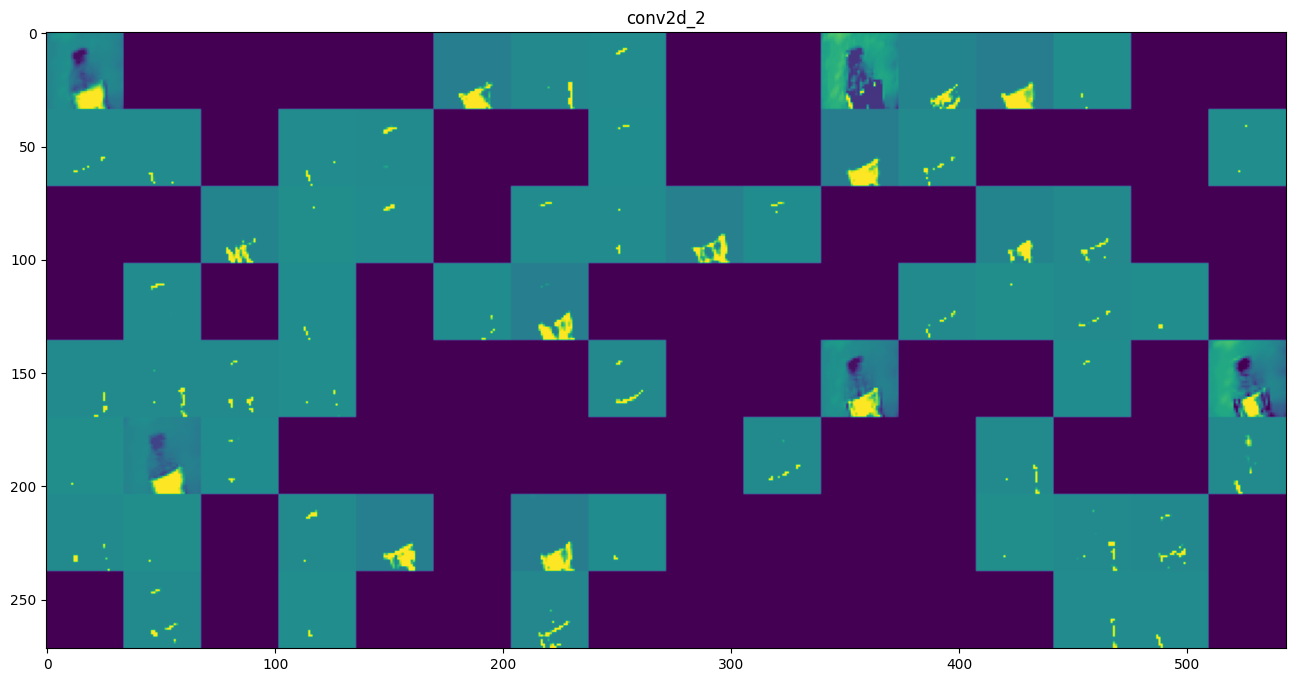

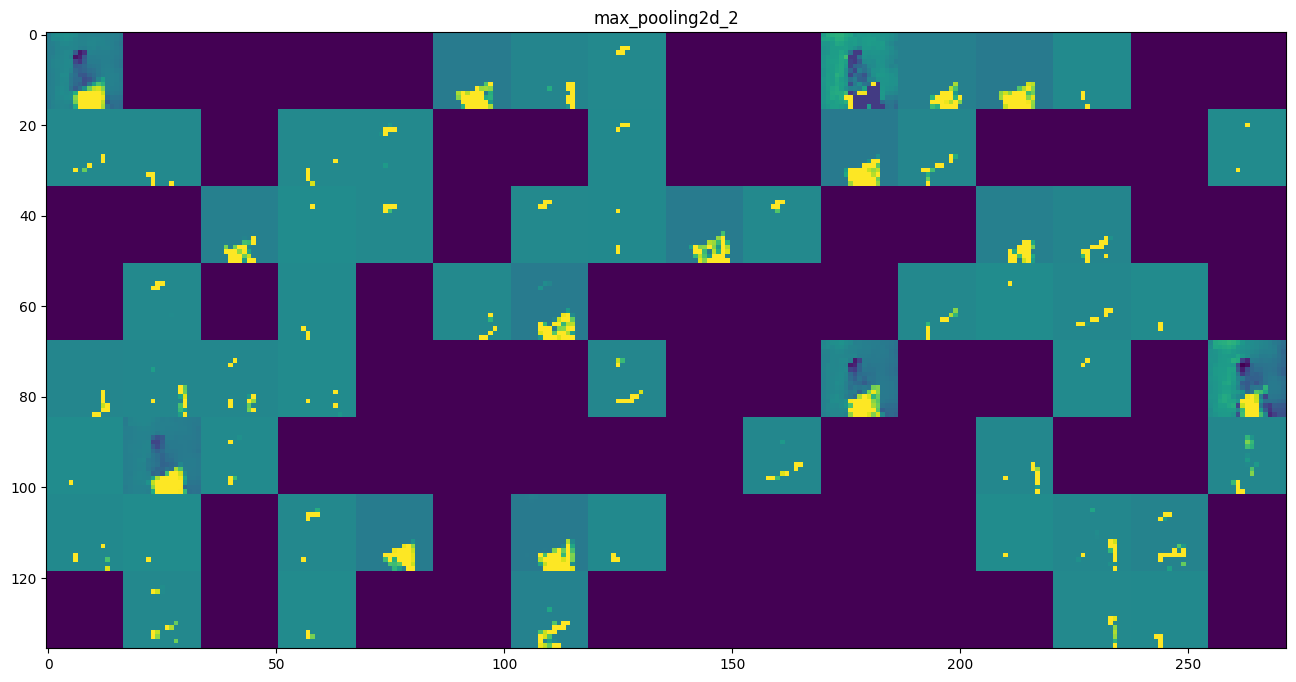

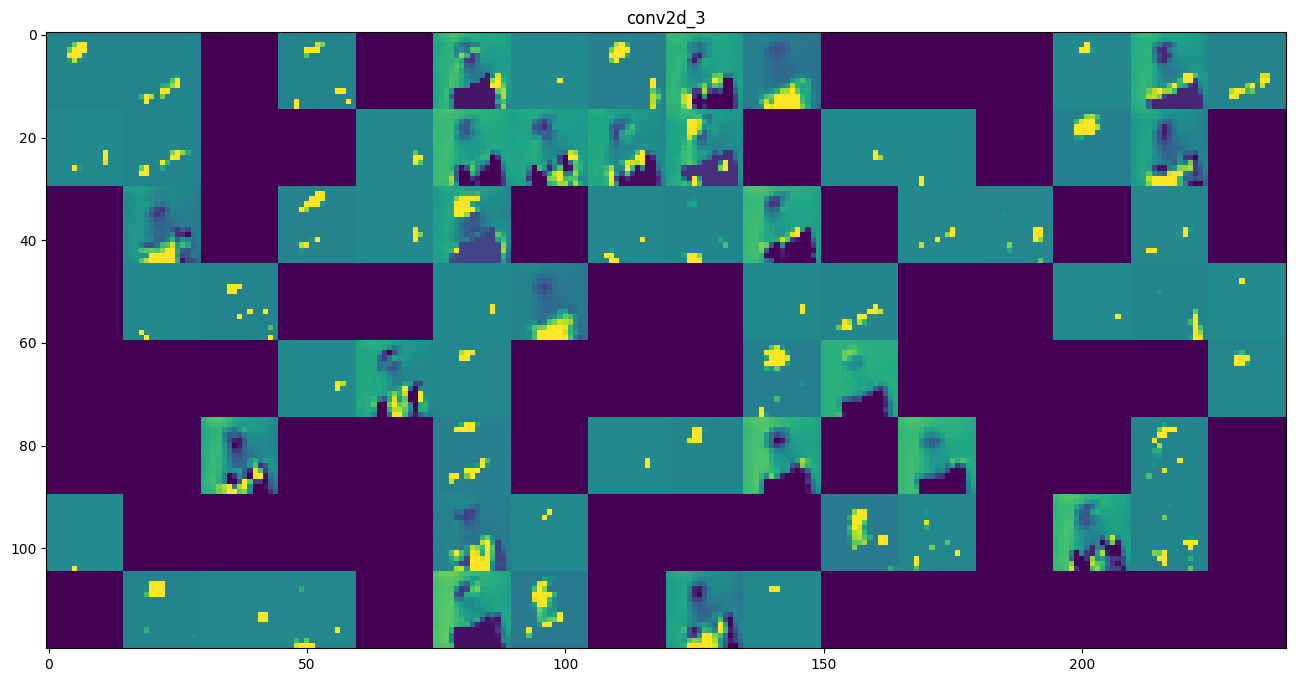

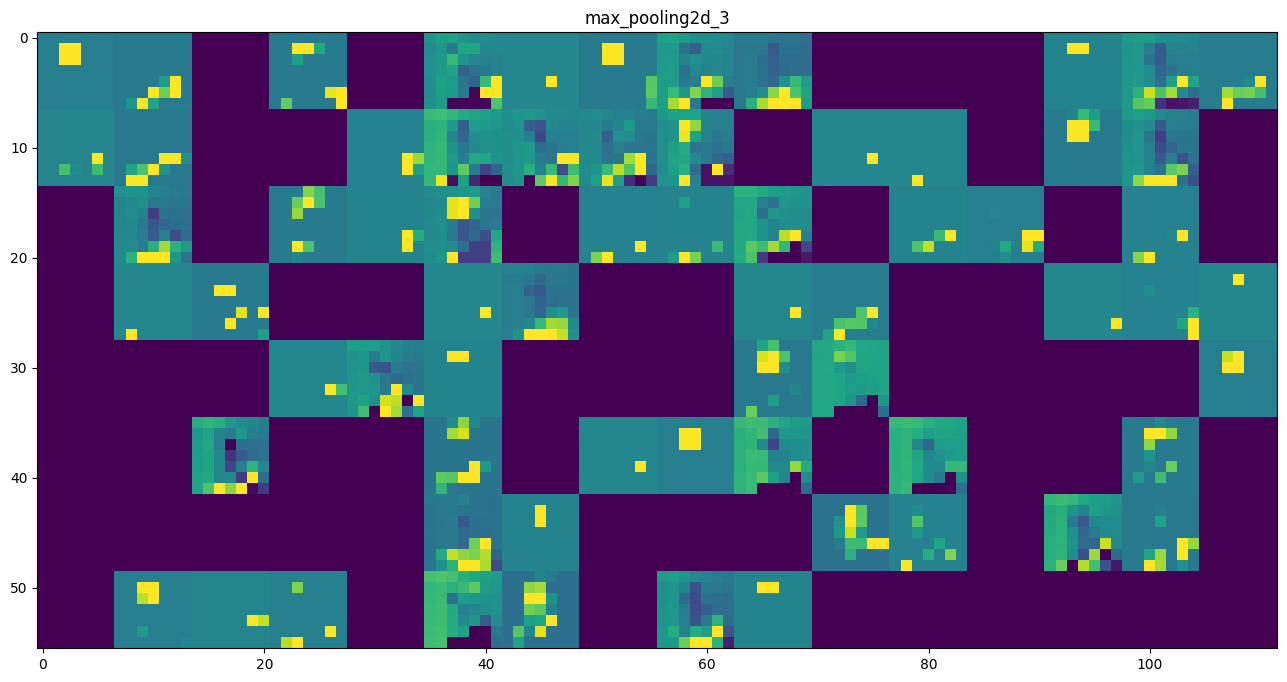

In [ ]:
# Visualize feature maps of a convolutional layer
from tensorflow.keras import models

# Extract the outputs of the layers
layer_outputs = [layer.output for layer in model.layers[:8]]  # Adjust the range as needed
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# Prepare an image
img_path = '/content/dataset/plastic/plastic85.jpg'  # Change to your image path
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0


activations = activation_model.predict(img_array)


layer_names = [layer.name for layer in model.layers[:8]]
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')


In [ ]:
from google.colab import files

files.download('/content/drive/MyDrive/plastic_classifier_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>